In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy
from IPython.display import display, HTML, Markdown
import scipy.signal

def convolution(img, kernel, boundary="fill"):
    return scipy.signal.convolve2d(img, kernel, boundary=boundary)
    
    # expects the kernel to have odd size
    
    ksize_y = len(kernel)
    ksize_x = len(kernel[0])
    
    int(ksize_y / 2)
    
    result = copy.deepcopy(img)
    
    for y in range(len(img)):
        for x in range(len(img[y])):
            result[y][x] = 0
            for ky in range(ksize_y):
                for kx in range(ksize_x):
                    x_coord = (x + kx - int(ksize_x / 2)) % len(img[0]);
                    y_coord = (y + ky - int(ksize_y / 2)) % len(img);
                    pixel = img[y_coord][x_coord]
                    pixel *= kernel[ky][kx]
                    result[y][x] += pixel
    
    return result

def kernel_normalize(kernel):
    s = 0
    for y in range(len(kernel)):
        for x in range(len(kernel[y])):
            s += kernel[y][x]
    for y in range(len(kernel)):
        for x in range(len(kernel[y])):
            kernel[y][x] /= s
    
    return kernel

def kernel_proposed():
    return kernel_normalize([
        [2,4,2],
        [4,7.8,4],
        [2,4,2]
    ])

def kernel_proposed6():
    return kernel_normalize([
        [2,4,2],
        [4,7.92,4],
        [2,4,2]
    ])

def kernel_github():
    return [
        [1/16, 1/8, 1/16],
        [1/8, 1/4, 1/8],
        [1/16, 1/8, 1/16],
    ]

def kernel_paper():
    return [
        [1/256, 1/64, 3/128, 1/64, 1/256],
        [1/64, 1/16, 3/32, 1/16, 1/64],
        [3/128, 3/32, 9/64, 3/32, 3/128],
        [1/64, 1/16, 3/32, 1/16, 1/64],
        [1/256, 1/64, 3/128, 1/64, 1/256],
    ]
    
def kernel_paper_cropped():
    return kernel_normalize([
        [1/16, 3/32, 1/16],
        [3/32, 9/64, 3/32],
        [1/16, 3/32, 1/16],
    ])

def h_convolution(img, scale, base_kernel, boundary="fill"):
    kernel = []
    
    for y in range(scale*(len(base_kernel) - 1)+1):
        kernel.append([])
        for x in range(scale*(len(base_kernel[int(y / scale)]) - 1)+1):
            kernel[y].append(0)
            if y % scale == 0 and x % scale == 0:
                kernel[y][x] = base_kernel[int(y / scale)][int(x / scale)]

    return convolution(img, kernel, boundary)

def texture_center_dot(size=1):
    img = np.zeros((size,size))
    for y in range(size):
        for x in range(size):
            img[y][x] = 0
    img[int(size/2)][int(size/2)] = 1
    return img

## From small to big kernel

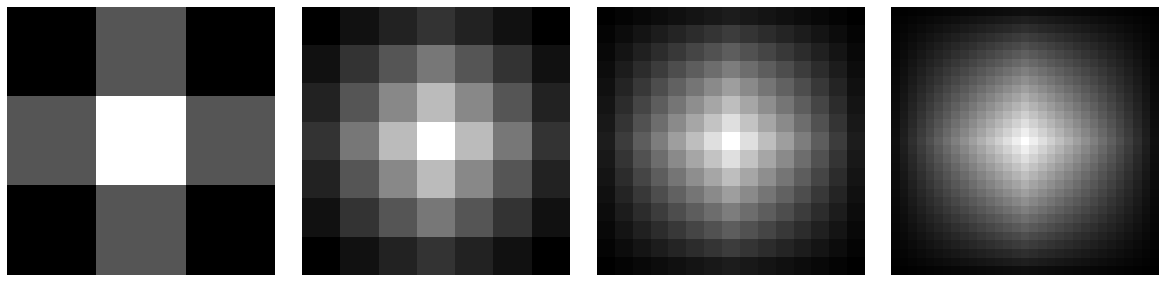

## From big to small kernel

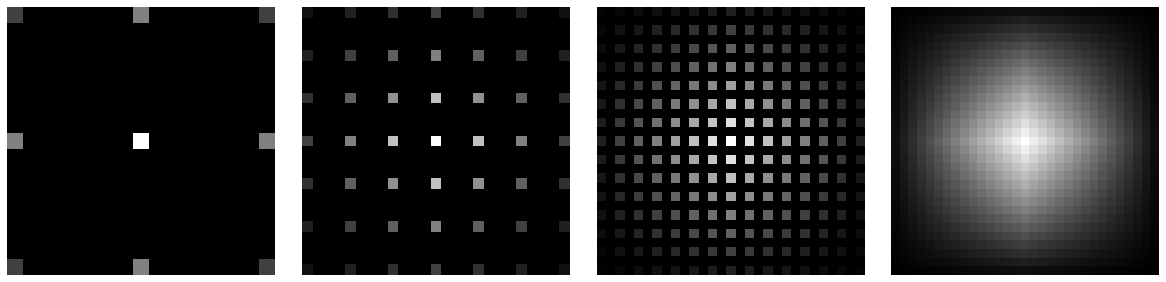

In [2]:
img = texture_center_dot()
kernel_scale = 1

display(Markdown("## From small to big kernel"))

fig = plt.figure(figsize=(16,16))
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.1, hspace=0)

for k in range(4):
    img = h_convolution(img, kernel_scale, kernel_github())
    fig.add_subplot(1,4,k+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    kernel_scale = int(kernel_scale * 2)

plt.show()
display(Markdown("## From big to small kernel"))
    
fig = plt.figure(figsize=(16,16))
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.1, hspace=0)

img = texture_center_dot()
kernel_scale = 8

for k in range(4):
    img = h_convolution(img, kernel_scale, kernel_github())
    fig.add_subplot(1,4,k+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    kernel_scale = int(kernel_scale * 0.5)


## Kernel comparison

|Position|Samples|Iterations|Total samples|Equivalent full kernel size|Relative efficiency|Kernel|
|:----:|:----:|:----:|:----:|:----:|:----:|----|
|1|9|4|36|17|8.00|Proposed|
|2|9|4|36|17|8.00|https://github.com/ZheyuanXie/CUDA-Path-Tracer-Denoising|
|3|25|3|75|13|2.25|F. Murtagh. Multiscale Transform Methods in Data Analysis<br>1D: ($\frac{1}{16}, \frac{1}{4}, \frac{3}{8}, \frac{1}{4}, \frac{1}{16}$)|
|4|9|4|36|17|8.00|F. Murtagh. Multiscale Transform Methods in Data Analysis - cropped to 3x3 and normalized<br>1D: ($\frac{1}{4}, \frac{3}{8}, \frac{1}{4}$) -> normalize



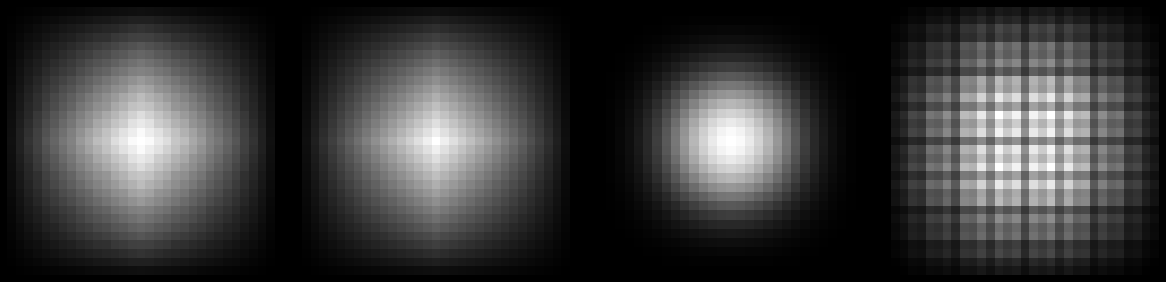

In [3]:
display(Markdown(r"""
## Kernel comparison

|Position|Samples|Iterations|Total samples|Equivalent full kernel size|Relative efficiency|Kernel|
|:----:|:----:|:----:|:----:|:----:|:----:|----|
|1|9|4|36|17|8.00|Proposed|
|2|9|4|36|17|8.00|https://github.com/ZheyuanXie/CUDA-Path-Tracer-Denoising|
|3|25|3|75|13|2.25|F. Murtagh. Multiscale Transform Methods in Data Analysis<br>1D: ($\frac{1}{16}, \frac{1}{4}, \frac{3}{8}, \frac{1}{4}, \frac{1}{16}$)|
|4|9|4|36|17|8.00|F. Murtagh. Multiscale Transform Methods in Data Analysis - cropped to 3x3 and normalized<br>1D: ($\frac{1}{4}, \frac{3}{8}, \frac{1}{4}$) -> normalize

"""))

fig = plt.figure(figsize=(16,8), facecolor='black')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.1, hspace=0.1)

img = texture_center_dot()
kernel_scale = 1
for k in range(4):
    img = h_convolution(img, kernel_scale, kernel_proposed())
    kernel_scale = int(kernel_scale * 2.0)
plt.subplot(1,4,1)
plt.imshow(img, cmap='gray')
plt.axis('off')

img = texture_center_dot()
kernel_scale = 1
for k in range(4):
    img = h_convolution(img, kernel_scale, kernel_github())
    kernel_scale = int(kernel_scale * 2.0)
plt.subplot(1,4,2)
plt.imshow(img, cmap='gray')
plt.axis('off')

img = texture_center_dot()
kernel_scale = 1
for k in range(3):
    img = h_convolution(img, kernel_scale, kernel_paper())
    kernel_scale = int(kernel_scale * 2.0)
plt.subplot(1,4,3)
plt.imshow(img, cmap='gray')
plt.axis('off')

img = texture_center_dot()
kernel_scale = 1
for k in range(4):
    img = h_convolution(img, kernel_scale, kernel_paper_cropped())
    kernel_scale = int(kernel_scale * 2.0)
plt.subplot(1,4,4)
plt.imshow(img, cmap='gray')
plt.axis('off')

print()



## Artifact comparison



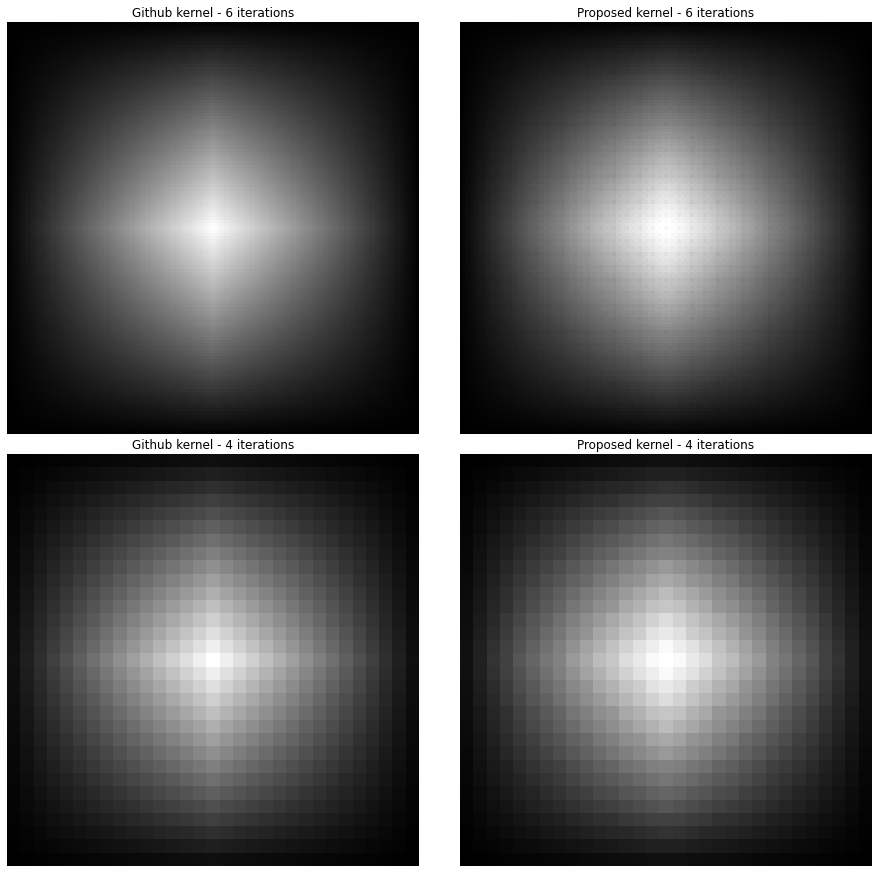



### Github kernel

https://github.com/ZheyuanXie/CUDA-Path-Tracer-Denoising<br>
<img src="https://raw.githubusercontent.com/ZheyuanXie/CUDA-Path-Tracer-Denoising/master/img/atrous_kernel.png" width="600">

**Proposed** kernel has slightly reduced center coefficient.<br>
It reduces the bright cross on 4 iterstions without significant artifacts,<br>
but creates regular artifacts on 6 iterations.

It appears as the number of iterations increases, the kernel becomes more sensitive to alterations



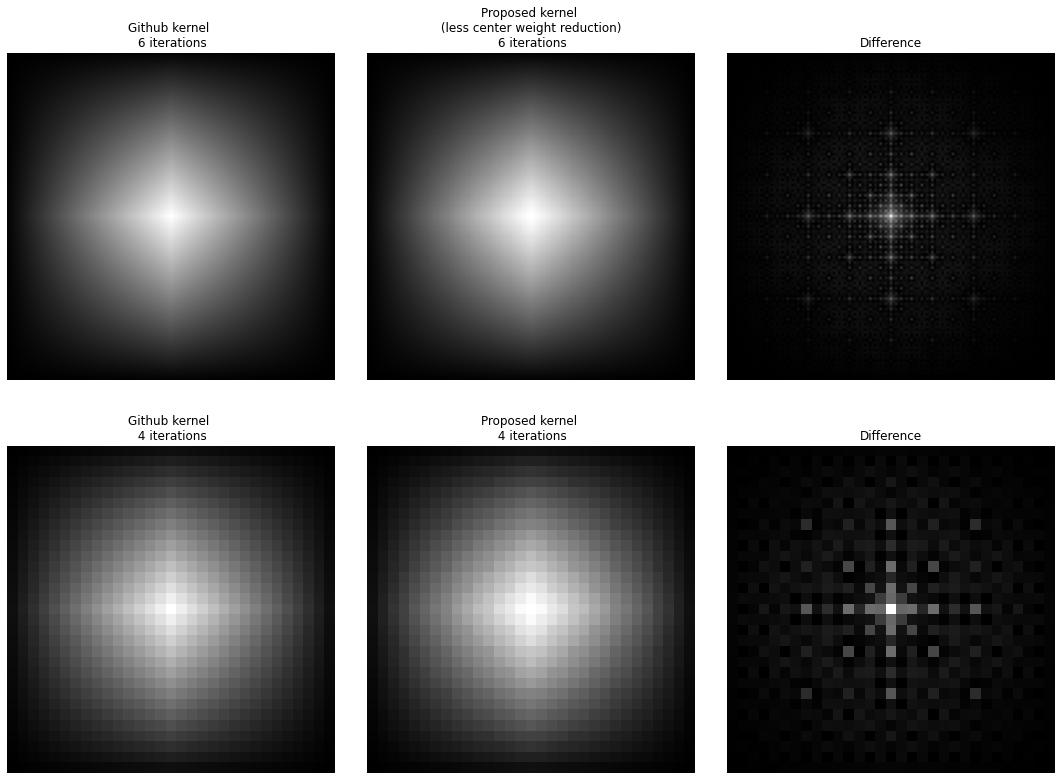



With 6 iterations reducing center weight can not significantly reduce the bright cross without creating artifacts.<br>
It appears kernel alterations are only feasible for small number of iterations (less than 6)



In [4]:
display(Markdown(r"""

## Artifact comparison

"""))

img = texture_center_dot()
kernel_scale = 1

fig = plt.figure(figsize=(12,12))
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.1, hspace=0)

for k in range(6):
    img = h_convolution(img, kernel_scale, kernel_github())
    kernel_scale = int(kernel_scale * 2)

sp = fig.add_subplot(2,2,1)
sp.imshow(img, cmap='gray')
sp.axis('off')
sp.set_title("Github kernel - 6 iterations")

img = texture_center_dot()
kernel_scale = 1

for k in range(6):
    img = h_convolution(img, kernel_scale, kernel_proposed())
    kernel_scale = int(kernel_scale * 2)

sp = fig.add_subplot(2,2,2)
sp.imshow(img, cmap='gray')
sp.axis('off')
sp.set_title("Proposed kernel - 6 iterations")

img = texture_center_dot()
kernel_scale = 1

for k in range(4):
    img = h_convolution(img, kernel_scale, kernel_github())
    kernel_scale = int(kernel_scale * 2)

sp = fig.add_subplot(2,2,3)
sp.imshow(img, cmap='gray')
sp.axis('off')
sp.set_title("Github kernel - 4 iterations")

img = texture_center_dot()
kernel_scale = 1

for k in range(4):
    img = h_convolution(img, kernel_scale, kernel_proposed())
    kernel_scale = int(kernel_scale * 2)

sp = fig.add_subplot(2,2,4)
sp.imshow(img, cmap='gray')
sp.axis('off')
sp.set_title("Proposed kernel - 4 iterations")

plt.show()

display(Markdown(r"""

### Github kernel

https://github.com/ZheyuanXie/CUDA-Path-Tracer-Denoising<br>
<img src="https://raw.githubusercontent.com/ZheyuanXie/CUDA-Path-Tracer-Denoising/master/img/atrous_kernel.png" width="600">

**Proposed** kernel has slightly reduced center coefficient.<br>
It reduces the bright cross on 4 iterstions without significant artifacts,<br>
but creates regular artifacts on 6 iterations.

It appears as the number of iterations increases, the kernel becomes more sensitive to alterations

"""))

fig = plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.5, bottom=0.0, right=1.0, top=1.0, wspace=0.0, hspace=0.2)

img = texture_center_dot()
kernel_scale = 1

for k in range(6):
    img = h_convolution(img, kernel_scale, kernel_github())
    kernel_scale = int(kernel_scale * 2)

sp = fig.add_subplot(2,3,1)
sp.imshow(img, cmap='gray')
sp.axis('off')
sp.set_title("Github kernel \n 6 iterations")

img2 = texture_center_dot()
kernel_scale = 1

for k in range(6):
    img2 = h_convolution(img2, kernel_scale, kernel_proposed6())
    kernel_scale = int(kernel_scale * 2)

sp = fig.add_subplot(2,3,2)
sp.imshow(img2, cmap='gray')
sp.axis('off')
sp.set_title("Proposed kernel \n (less center weight reduction) \n 6 iterations")

img = np.absolute(np.subtract(img, img2))
sp = fig.add_subplot(2,3,3)
plt.imshow(img, cmap='gray')
plt.axis('off')
sp.set_title("Difference")

img = texture_center_dot()
kernel_scale = 1

for k in range(4):
    img = h_convolution(img, kernel_scale, kernel_github())
    kernel_scale = int(kernel_scale * 2)

sp = fig.add_subplot(2,3,4)
sp.imshow(img, cmap='gray')
sp.axis('off')
sp.set_title("Github kernel \n 4 iterations")

img2 = texture_center_dot()
kernel_scale = 1

for k in range(4):
    img2 = h_convolution(img2, kernel_scale, kernel_proposed())
    kernel_scale = int(kernel_scale * 2)

sp = fig.add_subplot(2,3,5)
sp.imshow(img2, cmap='gray')
sp.axis('off')
sp.set_title("Proposed kernel \n 4 iterations")

img = np.absolute(np.subtract(img, img2))
sp = fig.add_subplot(2,3,6)
plt.imshow(img, cmap='gray')
plt.axis('off')
sp.set_title("Difference")

plt.show()

display(Markdown(r"""

With 6 iterations reducing center weight can not significantly reduce the bright cross without creating artifacts.<br>
It appears kernel alterations are only feasible for small number of iterations (less than 6)

""")) 



## 1D convergence test





|||
|----|----|
|F. Murtagh|F. Murtagh. Multiscale Transform Methods in Data Analysis<br>($\frac{1}{16}, \frac{1}{4}, \frac{3}{8}, \frac{1}{4}, \frac{1}{16}$)|
|F. Murtagh (cropped and normalized)|($\frac{1}{4}, \frac{3}{8}, \frac{1}{4}$) -> normalize -> (0.28, 0.42, 0.28)|
|Github|<br>https://github.com/ZheyuanXie/CUDA-Path-Tracer-Denoising<br>$(\frac{1}{4}, \frac{1}{2}, \frac{1}{4})$|



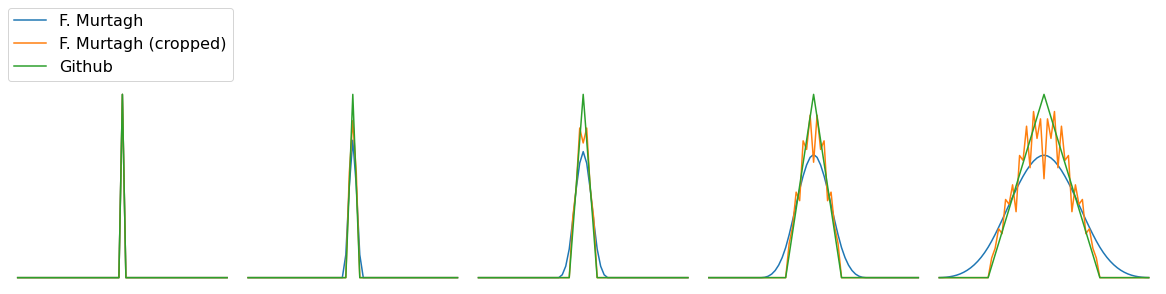



Cropped to 3 samples F. Murtagh kernel does not converge at all, even though it is quite close to github kernel.<br>
Github kernel converges perfectly to a triangle.<br><br>



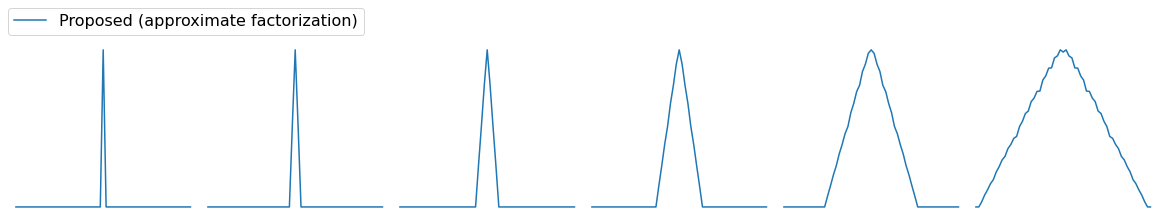



Factorized into 1D, proposed kernel does not converge smoothly.<br>
But in 2D it gets rid of the bright cross at the cost of marginally less smooth distance fading.

It appears constructing a good 2D kernel is more complex than just multiplying row-vector and column-vector of a good 1D kernel.

**Edit:**

Proposed kernel will only converge in 2D with small number of iterations (less than 6),<br>
with 6+iterations it generates artifacts.

It appears 2D convergence and 1D convergence are connected, but on small number of iterations 2D convergence is possible without 1D convergence.



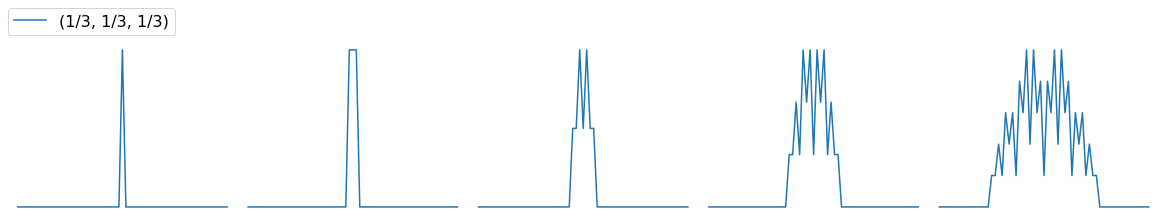



Kernel $(\frac{1}{3}, \frac{1}{3}, \frac{1}{3})$ does not converge. **Need to figure out the convergence condition**.

**ToDo**: make a demo comparing 6 iterations of 1D kernel with different center values



In [10]:
display(Markdown(r"""

## 1D convergence test

"""))

fig, subplots = plt.subplots(1,5,figsize=(16,4))
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.7, wspace=0, hspace=0)

def convolution_1D(arr, kernel):
    buf = []
    
    for position in range(len(arr)):
            value = 0

            for kernel_position in range(len(kernel)):
                sampling_position = position + kernel_position - int(len(kernel) / 2)
                sampling_position = (sampling_position + len(arr)) % len(arr)
                value += arr[sampling_position] * kernel[kernel_position]

            buf.append(value)
    
    return buf

def demo_kernel(base_kernel, num_iter=5):
    arr = []
    for i in range(61):
        arr.append(0)

    arr[30] = 1
    
    gap = 1

    for iteration in range(num_iter):
        #fig.add_subplot(1,4,iteration + 1)
        subplots[iteration].axis('off')
        subplots[iteration].plot(arr)
           

        kernel = []
        for base_kernel_index in range(len(base_kernel) - 1):
            kernel.append(base_kernel[base_kernel_index])
            for _ in range(gap - 1):
                kernel.append(0)
        kernel.append(base_kernel[-1])
        gap = int(gap * 2)

        arr = convolution_1D(arr, kernel)
        
display(Markdown(r"""

|||
|----|----|
|F. Murtagh|F. Murtagh. Multiscale Transform Methods in Data Analysis<br>($\frac{1}{16}, \frac{1}{4}, \frac{3}{8}, \frac{1}{4}, \frac{1}{16}$)|
|F. Murtagh (cropped and normalized)|($\frac{1}{4}, \frac{3}{8}, \frac{1}{4}$) -> normalize -> (0.28, 0.42, 0.28)|
|Github|<br>https://github.com/ZheyuanXie/CUDA-Path-Tracer-Denoising<br>$(\frac{1}{4}, \frac{1}{2}, \frac{1}{4})$|

"""))

demo_kernel([1/16,1/4,3/8,1/4,1/16])
cropped = [1/4,3/8,1/4]
cropped_sum = sum(cropped)
for i in range(len(cropped)):
    cropped[i] /= cropped_sum
demo_kernel(cropped)
demo_kernel([1/4,1/2,1/4])
fig.legend(["F. Murtagh", "F. Murtagh (cropped)", "Github"], loc="upper left", fontsize=16)
plt.show()

display(Markdown(r"""

Cropped to 3 samples F. Murtagh kernel does not converge at all, even though it is quite close to github kernel.<br>
Github kernel converges perfectly to a triangle.<br><br>

"""))

fig, subplots = plt.subplots(1,6,figsize=(16,3))
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.8, wspace=0, hspace=0)
demo_kernel([0.253,0.494,0.253], 6)
fig.legend(["Proposed (approximate factorization)"], loc="upper left", fontsize=16)
plt.show()

display(Markdown(r"""

Factorized into 1D, proposed kernel does not converge smoothly.<br>
But in 2D it gets rid of the bright cross at the cost of marginally less smooth distance fading.

It appears constructing a good 2D kernel is more complex than just multiplying row-vector and column-vector of a good 1D kernel.

**Edit:**

Proposed kernel will only converge in 2D with small number of iterations (less than 6),<br>
with 6+iterations it generates artifacts.

It appears 2D convergence and 1D convergence are connected, but on small number of iterations 2D convergence is possible without 1D convergence.

"""))

fig, subplots = plt.subplots(1,5,figsize=(16,3))
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.8, wspace=0, hspace=0)
demo_kernel([1/3,1/3,1/3])
fig.legend(["(1/3, 1/3, 1/3)"], loc="upper left", fontsize=16)
plt.show()

display(Markdown(r"""

Kernel $(\frac{1}{3}, \frac{1}{3}, \frac{1}{3})$ does not converge. **Need to figure out the convergence condition**.

**ToDo**: make a demo comparing 6 iterations of 1D kernel with different center values

"""))



1. Kernel = (1, center_coef, 1)
2. Normalize kernel (divide by sum)
3. Five convolutions with increasing sparse kernel size (padding with zeroes)



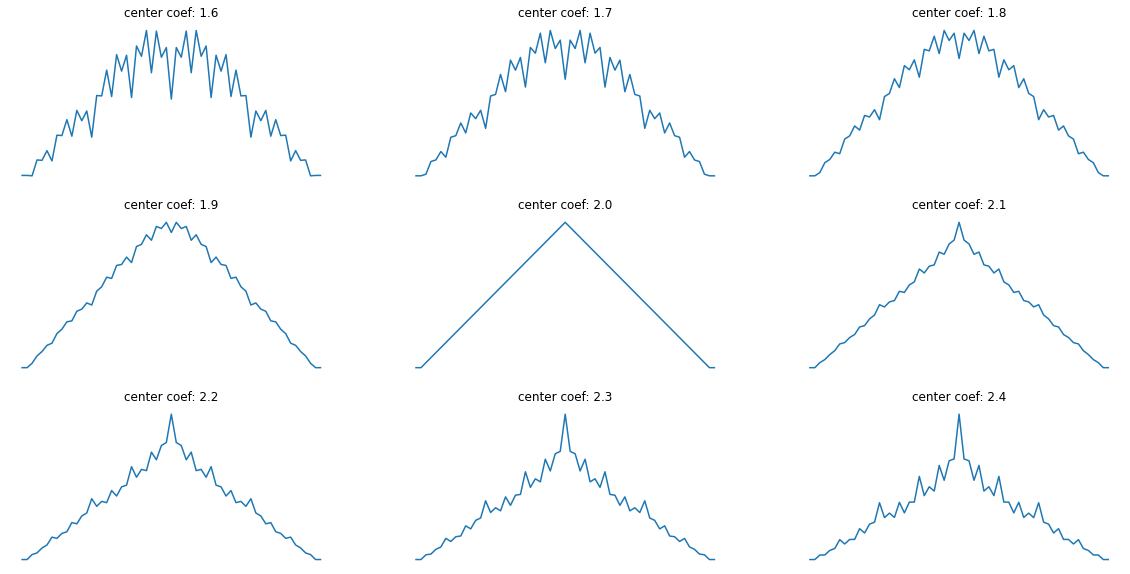



<br>
Only one (github) kernel converges: $(\frac{1}{4}, \frac{1}{2}, \frac{1}{4})$
<br><br>

**Question:** is there only one converging kernel for each given size, or larger sizes can have multiple different convering kernels?



In [6]:
display(Markdown(r"""

1. Kernel = (1, center_coef, 1)
2. Normalize kernel (divide by sum)
3. Five convolutions with increasing sparse kernel size (padding with zeroes)

"""))

def test_1D_kernel(center_coef, scale):
    base_kernel = [1, center_coef, 1]
    s = sum(base_kernel)
    for i in range(len(base_kernel)):
        base_kernel[i] /= s
    kernel = []
    for i in range(scale*2+1):
        if i % scale == 0:
            kernel.append(base_kernel[int(i / scale)])
        else:
            kernel.append(0)
    return kernel

fig, subplots = plt.subplots(3,3,figsize=(20,10))  
        
for i in range(-4, 5):
    center_coef = 2 + i*0.1;
    
    arr = [0 for x in range(61)]
    arr[30] = 1
    
    kernel_scale = 16
    for k in range(5):
        kernel = test_1D_kernel(center_coef, kernel_scale)
        arr = convolution_1D(arr, kernel)
        kernel_scale = int(kernel_scale * 0.5)
    
    subplots[int((i+4)/3)][(i+4)%3].plot(arr)
    subplots[int((i+4)/3)][(i+4)%3].axis('off')
    subplots[int((i+4)/3)][(i+4)%3].set_title("center coef: " + str(center_coef))

plt.show()

display(Markdown(r"""

<br>
Only one (github) kernel converges: $(\frac{1}{4}, \frac{1}{2}, \frac{1}{4})$
<br><br>

**Question:** is there only one converging kernel for each given size, or larger sizes can have multiple different convering kernels?

"""))